c:\Users\albsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.2905 - loss: 1.9256 - val_accuracy: 0.4448 - val_loss: 1.5455
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4639 - loss: 1.4899 - val_accuracy: 0.5102 - val_loss: 1.3666
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5095 - loss: 1.3592 - val_accuracy: 0.5342 - val_loss: 1.3063
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5356 - loss: 1.2909 - val_accuracy: 0.5462 - val_loss: 1.2779
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5658 - loss: 1.2206 - val_accuracy: 0.5736 - val_loss: 1.2084
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5796 - loss: 1.1740 - val_accuracy: 0.5816 - val_loss: 1.1993
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6062 - loss: 1.1175 - val_accuracy: 0.5944 - val_loss: 1.1519
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6096 - loss: 1.0991 - val_accuracy

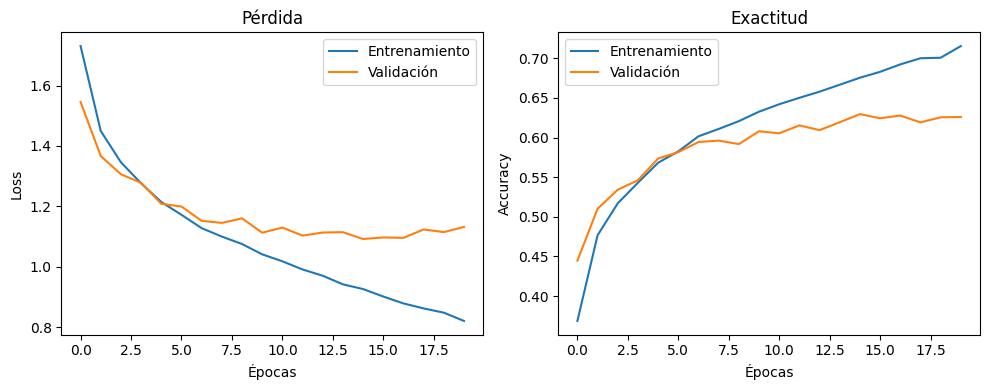

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# 1. CARGAR EL DATASET CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. PREPROCESAR LOS DATOS
# Convertimos a float32 y normalizamos entre 0 y 1
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Las etiquetas necesitan convertirse a one-hot
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# 3. DEFINIR EL MODELO LENET-5 ADAPTADO A CIFAR-10
lenet = Sequential()
lenet.add(Conv2D(6, (5,5), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))
lenet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
lenet.add(Conv2D(16, (5,5), strides=(1,1), padding='valid', activation='relu'))
lenet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
lenet.add(Flatten())
lenet.add(Dense(120, activation='relu'))
lenet.add(Dense(84, activation='relu'))
lenet.add(Dense(10, activation='softmax'))

# Mostrar la arquitectura del modelo
lenet.summary()

# 4. COMPILAR EL MODELO
lenet.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 5. ENTRENAR EL MODELO
# Aumentamos el número de épocas debido a la mayor complejidad de CIFAR-10
history = lenet.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)

# 6. EVALUAR EL MODELO EN EL CONJUNTO DE PRUEBA
test_loss, test_acc = lenet.evaluate(x_test, y_test, verbose=0)
print('Pérdida en test:', test_loss)
print('Exactitud en test:', test_acc)

# GRAFICAR LA EVOLUCIÓN DEL ENTRENAMIENTO
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Exactitud')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
